# REGRESI 
--- 

<b>Pemateri:</b>
- Muhammad Arif Rahman
- Rosalina Paramita

**Ministry of Finance - Data Analytics Community**


In [ ]:
#install library yang mungkin belum tersedia
# !pip install sklearn
# !pip install statsmodels

In [6]:
# jika menggunakan google colab dan butuh upload file csv
#from google.colab import files
#files.upload()

KeyboardInterrupt: ignored

## DEFINISI

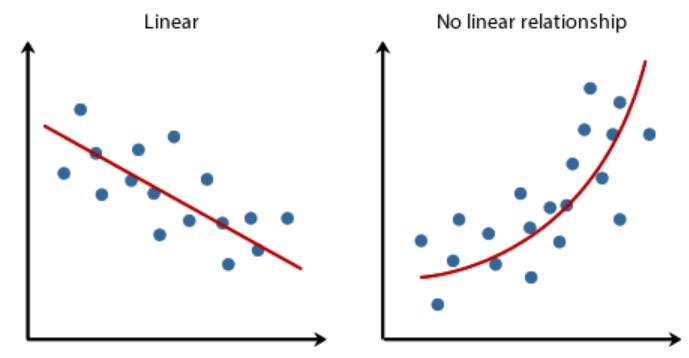

<b>Dependent Var = Constant + Slope*Independent Variable + Error 

## Simple Linear Regression

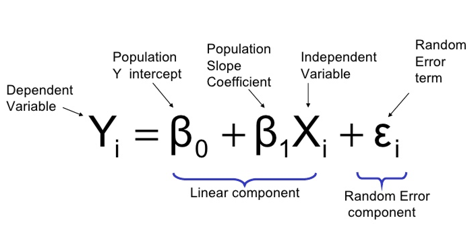

### Ordinary Least Squares

 <h1>$min_{\beta_{0},\beta_{1}}\sum_{i=1}^n (Y_i - \beta_{0} - \beta_{1}X_i)^2$

<b>https://www.geogebra.org/m/crBa6TAW</b>

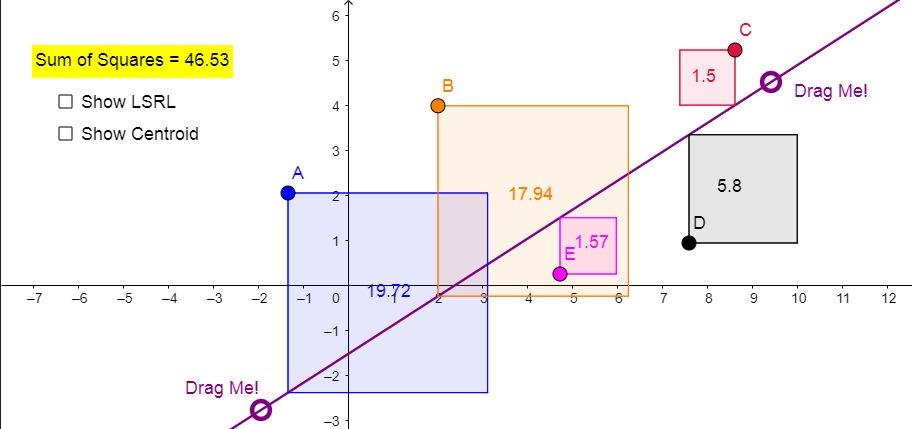

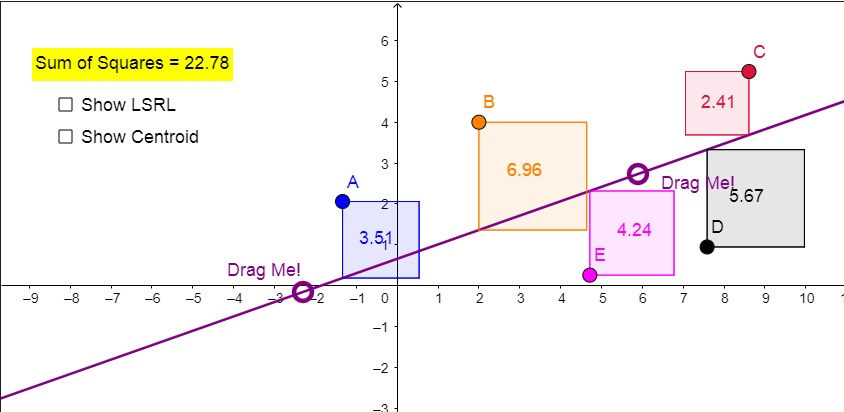

### R-Square

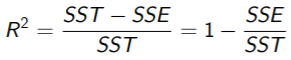

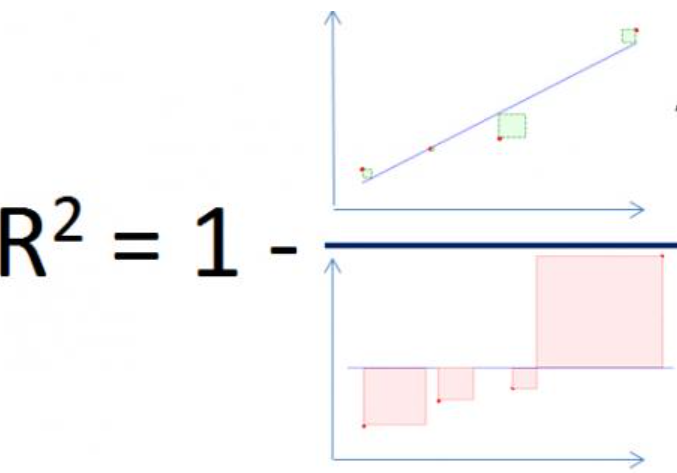

### Latihan - Simple Linear Regression

In [3]:
#core package for data science
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

#import package for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#hide warnings so you can't find any warning
import warnings 
warnings.simplefilter('ignore')

print("Done !!!")

Done !!!


In [4]:
data_sim = pd.read_csv("salary.csv",sep = ';') 
data_sim.head()

FileNotFoundError: ignored

Text(0, 0.5, 'Pendapatan (dalam $1000)')

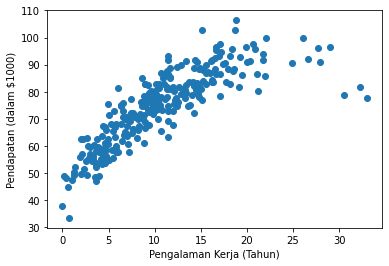

In [ ]:
plt.scatter(data_sim.exp, data_sim.salary)
plt.xlabel("Pengalaman Kerja (Tahun)")
plt.ylabel("Pendapatan (dalam $1000)")

In [ ]:
np.corrcoef(data_sim.exp, data_sim.salary)[0][1]

0.8229888884056297

Pengalaman bekerja berkorelasi positif dengan pendapatan sebesar 0.82

#### Membangun Model

In [ ]:
y_data_sim = np.array(data_sim.salary).reshape(-1,1)#data.salary
x_data_sim = np.array(data_sim.exp).reshape(-1,1)#data.exp

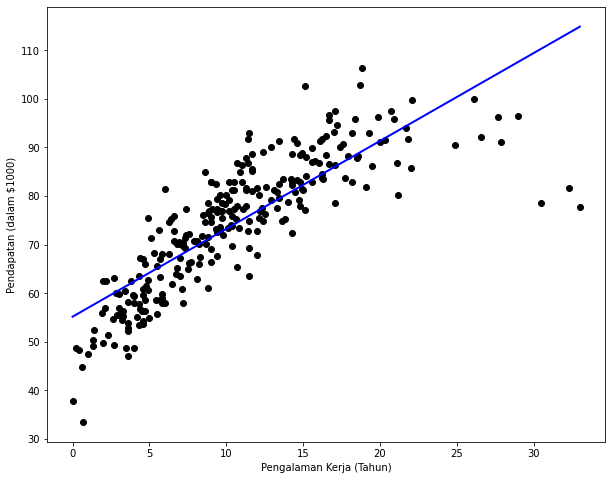

In [ ]:
lm = LinearRegression()

lm.fit(x_data_sim ,y_data_sim)
predictions = lm.predict(x_data_sim)
plt.figure(figsize=(10, 8))
plt.scatter(
    data_sim.exp,
    data_sim.salary,
    c='black'
)
plt.plot(
    data_sim.exp,
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Pengalaman Kerja (Tahun)")
plt.ylabel("Pendapatan (dalam $1000)")
plt.show()

In [ ]:
print ("Nilai koefisien X:", lm.coef_)
print ("Nilai koefisien intersep:", lm.intercept_)

Nilai koefisien X: [[1.80853596]]
Nilai koefisien intersep: [55.17978465]


#### Interpretasi Model

Dari output diatas didapat model regresi linier sederhana sebagai berikut

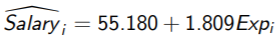

<li> Pendapatan minimum bagi pekerja yang belum berpengalaman diperkirakan sebesar 55180 dollar
<li> Penambahan satu tahun pengalaman diperkirakan akan menaikkan pendapatan sebesar 1809 dollar
     

#### Evaluasi Model

In [ ]:
print("R-square dari model regresi diatas :", lm.score(x_data_sim, y_data_sim))

R-square dari model regresi diatas : 0.6773107104391334


Sebesar 67.7% variasi pendapatan dapat dijelaskan oleh lama pengalaman bekerja</ul>  

## Multi Linear Regression

mreg1.png

### Pengembangan Model untuk Inference
<li> Transformasi Non-linear
<li> Interaksi antar independen variabel 

### Latihan - Multi Linear Regression

Apakah ada faktor lain yang dapat mempengaruhi jumlah pendapatan yang diterima pekerja?

In [ ]:
data = pd.read_csv("salary_multi.csv",sep = ',') 
data.head()

,salary,age,Expr,education,Gender
0,74.90,31.7,13.6,15,M
1,63.50,30.3,11.5,14,F
2,80.15,39.4,21.2,14,M
3,67.85,34.5,12.0,14,M
4,33.50,22.9,0.7,14,M


Informasi Variabel: <br>
**salary** :
jumlah pendapatan pekerja dalam 1000 dollar

**age** :
umur dalam tahun

**Expr** :
lama pengalaman bekerja (tahun)

**education** :
jenjang pendidikan terakhir
<br>10 : minimum school leaving age
<br>14 : began university
<br>15 : completed bachelor
<br>16 : postgraduate
<br>17 : PhD

**gender** :
<br>F : female
<br>M : male


#### EDA dan Data Processing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   salary     273 non-null    float64
 1   age        273 non-null    float64
 2   Expr       273 non-null    float64
 3   education  273 non-null    int64  
 4   Gender     273 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 10.8+ KB


In [ ]:
data.describe()

,salary,age,Expr,education
count,273.000000,273.000000,273.000000,273.000000
mean,74.293956,30.071062,10.568864,14.289377
std,13.517258,6.804373,6.151137,0.907767
min,33.500000,18.800000,0.000000,10.000000
25%,63.650000,25.000000,5.800000,14.000000
50%,75.650000,29.200000,9.700000,14.000000
75%,83.600000,34.100000,14.400000,15.000000
max,106.400000,60.500000,33.000000,17.000000


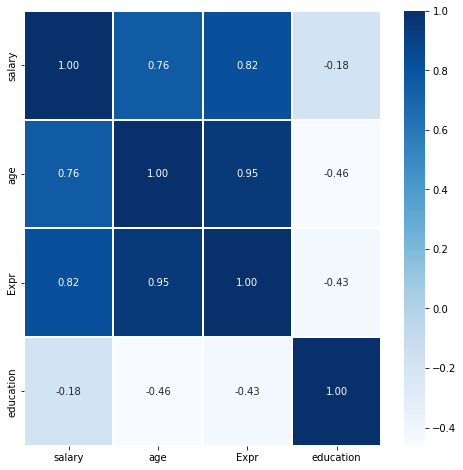

In [ ]:
plt.figure(figsize=(8,8)) #Mengubah ukuran plot data, kamu bisa mengubah angka dengan nilai berapa saja
sns.heatmap(data.corr(), #data apa yang ingin dibuat plot, kasus ini akan membuat plot nilai korelasi
            annot=True, #jika ingin mendapatkan nilai 
            linewidths=.10, #panjang garis jarak kotak satu ke lainnya
            fmt = '.2f', #banyaknya angka dibelakang koma
            cmap='Blues'); #warna maps

In [ ]:
# encoding untuk kolom Gender
label = {'M':0,'F':1}
data['female'] = data.Gender.map(label)

# encoding untuk kolom education
label = {10:0,14:1,15:2,16:3,17:4}
data['educ_enc'] = data.education.map(label)

# print hasil implementasi
data.sample(3)

,salary,age,Expr,education,Gender,female,educ_enc
43,77.75,56.3,33.0,14,F,1,1
207,76.85,27.9,9.5,14,M,0,1
104,77.00,28.5,8.9,15,M,0,2


#### Membangun Model

#### Model 1 - linear dengan menggunakan semua variabel

In [ ]:
# memisahkan data X (independent variable) dan y (dependent var)
X = data[['age','Expr','educ_enc','female']]
y = data['salary'] 

In [ ]:
lm = LinearRegression()
lm.fit(X ,y)
print ("Nilai koefisien X:", lm.coef_)
print ("Nilai koefisien intersep:", lm.intercept_)
print("R-square dari model :", lm.score(X, y))

Nilai koefisien X: [-0.23971952  2.14820173  3.82764885 -4.57742507]
Nilai koefisien intersep: 54.93547049940921
R-square dari model : 0.7320133265518418


 <h4>$Salary_i = 54.935 - 0.240Age_i + 2.148Expr_i + 3.828Educ_i - 4.577Female_i$

<li> variabel Education memiliki nilai marjinal sebesar 3828 dollar, dengan pertambahan tetap sebesar 3828 setiap kenaikan jenjang pendidikan, apakah masuk akal?
    <ul>tamatan SMA => 0 dollar</ul> 
    <ul>kuliah => 1 x 3828 dollar</ul> 
    <ul>lulus Sarjana  =>  7656 dollar</ul> 
    <ul>lulus Magister =>  11484 dollar</ul> 
    <ul>lulus Doktoral =>  15312 dollar</ul> 
<li> ada penurunan pendapatan 4577 dollar untuk pekerja wanita, diskriminatif?? 
<li> umur memiliki pengaruh negatif ke jumlah pendapatan
 

#### Model 2 - menyesuaikan variabel education dan pengecekan interaksi gender dan age

<b> Apakah ada penjelasan yang lebih sesuai untuk relasi antar pendapatan dan jenjang pendidikan?

<b> Apakah ada diskriminasi untuk wanita yang berumur?

In [ ]:
# membuat var Education jadi kategori
educ14_label = {10:0,14:1,15:0,16:0,17:0}
data['educ14'] = data.education.map(educ14_label)

educ15_label = {10:0,14:0,15:1,16:0,17:0}
data['educ15'] = data.education.map(educ15_label)

educ16_label = {10:0,14:0,15:0,16:1,17:0}
data['educ16'] = data.education.map(educ16_label)

educ17_label = {10:0,14:0,15:0,16:0,17:1}
data['educ17'] = data.education.map(educ17_label)

#menyiapkan kolom gender x age
data['femaleXage'] = data.female * data.age


data.sample(3)

,salary,age,Expr,education,Gender,female,educ_enc,educ14,educ15,educ16,educ17,femaleXage
88,70.10,30.1,8.7,14,M,0,1,1,0,0,0,0.0
178,63.35,22.5,5.7,14,M,0,1,1,0,0,0,0.0
148,88.25,41.3,18.6,14,F,1,1,1,0,0,0,41.3


In [ ]:
# memisahkan data X dan y
X = data[['age','Expr','educ14','educ15','educ16','educ17','female', 'femaleXage']]
y = data['salary'] 

lm = LinearRegression()
lm.fit(X ,y)
print ("Nilai koefisien X:", lm.coef_)
print ("Nilai koefisien intersep:", lm.intercept_)
print("R-square dari model :", lm.score(X, y))

Nilai koefisien X: [-0.21981014  2.12651131  9.97327778 14.88821755 13.41175436 24.77184625
 -7.42275864  0.10887542]
Nilai koefisien intersep: 48.451142150080685
R-square dari model : 0.7447573074321667


 <h4>$Salary_i = 48.451 - 0.220Age_i + 2.127Expr_i + 9.973Educ14_i + 14.888Educ15_i + 13.412Educ16_i + 24.772Educ17_i - 7.423Female_i + 0.109FemaleXAge_i$

<li> variabel Education lebih masuk akal?
    <ul>perbedaan efek marginal antar jenjang tidak linear</ul> 
    <ul>peningkatan paling besar dari tamatan SMA ke kuliah, dan dari postgrad ke PhD</ul> 
<li> tidak ada diskriminasi untuk pekerja wanita yang sudah berumur
 

#### Model 3 - memasukkan semua kemungkinan variabel (large model)

In [ ]:
#menyiapkan kolom 
data['age_sq'] = data.age**2
data['expr_sq'] = data.Expr**2
data['femaleXage_sq'] = data.female * data.age_sq

data_large = data #untuk dipake di regularized regression
data.sample(3)

,salary,age,Expr,education,Gender,female,educ_enc,educ14,educ15,educ16,educ17,femaleXage,age_sq,expr_sq,femaleXage_sq
17,82.85,35.5,18.2,14,M,0,1,1,0,0,0,0.0,1260.25,331.24,0.00
160,90.20,36.6,17.4,14,M,0,1,1,0,0,0,0.0,1339.56,302.76,0.00
176,56.75,22.1,4.4,14,F,1,1,1,0,0,0,22.1,488.41,19.36,488.41


In [ ]:
# memisahkan data X dan y
X = data[['age','age_sq','Expr','expr_sq','female','femaleXage','femaleXage_sq','educ14','educ15','educ16','educ17']]
y = data['salary'] 

lm = LinearRegression()
lm.fit(X ,y)
print ("Nilai koefisien X:", lm.coef_)
print ("Nilai koefisien intersep:", lm.intercept_)
print("R-square dari model :", lm.score(X, y))

Nilai koefisien X: [ 1.01494173e+00 -1.42681646e-02  3.86246552e+00 -7.31082976e-02
 -6.88019340e+00  3.55736560e-01 -6.40868079e-03  3.27248545e+00
  9.49021556e+00  9.91718340e+00  2.08275633e+01]
Nilai koefisien intersep: 22.86277843523183
R-square dari model : 0.8768935214342091


 <h4>$Salary_i = 22.86 + 1.01Age_i - 0.01Age^2_i + 3.86Expr_i - 0.07Expr^2_i - 6.88Female_i + 0.35Female_i*Age_i - 0.01Female_i*Age^2_i + 3.27Educ14_i + 9.49Educ15_i + 9.92Educ16_i + 20.83Educ17_i$

In [ ]:
from statsmodels.formula.api import ols

model = ols(formula='y ~ X', data=data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     169.0
Date:                Fri, 03 Sep 2021   Prob (F-statistic):          7.40e-112
Time:                        08:47:44   Log-Likelihood:                -811.83
No. Observations:                 273   AIC:                             1648.
Df Residuals:                     261   BIC:                             1691.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.8628      7.721      2.961      0.0

<li> $R^2$ = 87.69%
<li> variabel 'female','femaleXage','femaleXage_sq','educ14' secara statistik tidak terlalu signifikan 
 

#### Model 4 - best fit

In [ ]:
# memisahkan data X dan y
X = data[['age','age_sq','Expr','expr_sq','female','educ15','educ16','educ17']]
y = data['salary'] 

lm = LinearRegression()
lm.fit(X ,y)
print ("Nilai koefisien X:", lm.coef_)
print ("Nilai koefisien intersep:", lm.intercept_)
print("R-square dari model :", lm.score(X, y))

Nilai koefisien X: [ 1.24610616 -0.01840853  3.83263469 -0.07161955 -2.22535836  6.2262749
  6.69554066 17.51279701]
Nilai koefisien intersep: 23.134932780637484
R-square dari model : 0.8756888528728043


In [ ]:
model = ols(formula='y ~ X', data=data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     232.5
Date:                Fri, 03 Sep 2021   Prob (F-statistic):          8.07e-115
Time:                        08:54:39   Log-Likelihood:                -813.15
No. Observations:                 273   AIC:                             1644.
Df Residuals:                     264   BIC:                             1677.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.1349      7.222      3.204      0.0

<li> $R^2$ = 87.57%
<li> semua variabel secara statistik cukup signifikan 
 

 <h4>$Salary_i = 22.86 + 1.25Age_i - 0.02Age^2_i + 3.83Expr_i - 0.07Expr^2_i - 2.23Female_i + 6.23Educ15_i + 6.70Educ16_i + 17.51Educ17_i$

<li>dengan mengontrol variabel lainnya tetap, variabel Age berdampak positif ke Salary sampai umur 31 tahun <br>$1.25-(2*0.02Age) > 0$
<li> lama pengalaman bekerja berdampak positif hanya sampai 27 tahun
    <br>$3.83-(2*0.07Expr) > 0$
<li> umur dan pengalaman kerja memiliki korelasi tinggi, semakin berumur pasti semakin banyak pengalaman kerja yang dimiliki
<li> pekerja wanita memiliki upah 2230 dollar, lebih rendah dari pekerja pria dengan umur, pengalaman kerja dan jenjang pendidikan yang sama      
 

## Regresi untuk Prediksi

Model terbaik yang bisa digunakan untuk menjelaskan variasi pendapatan belum tentu menjadi model terbaik juga untuk prediksi data baru, karena tujuannya berbeda (**inference vs predictive ability**). 

### Mengukur akurasi prediksi

Out-sample measurement :
<br>$MAE$ = Mean Absolute Error
<br>$MSE$ = Mean Squared Error
<br>$RMSE$ = Root Mean Squared Error
<br>$MAPE$ = Mean Absolute Percentage Error

#### MAE (Mean Absolute Error)

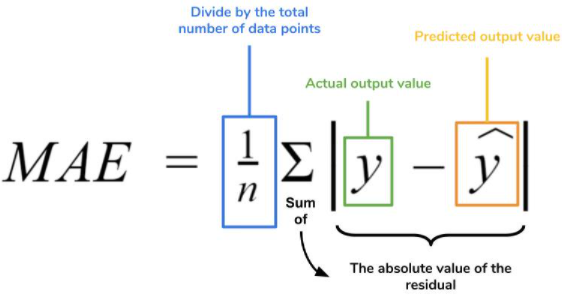

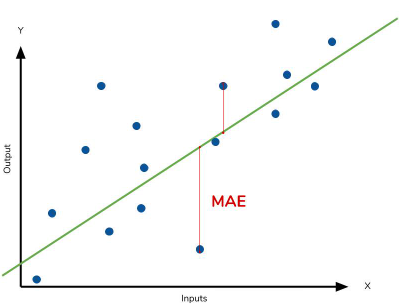

#### MSE (Mean Absolute Error) dan RMSE (Root Mean Absolute Error)

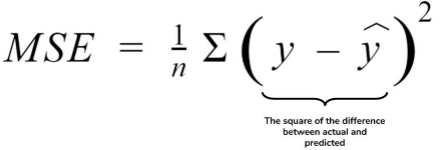

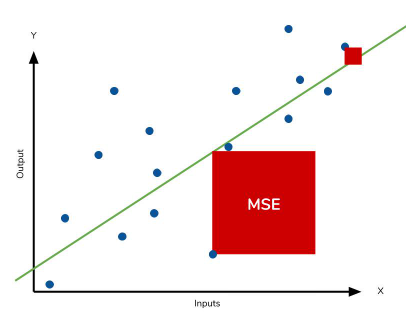

#### MAPE (Mean Absolute Percentage Error)

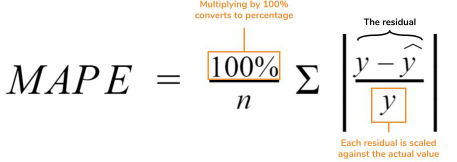

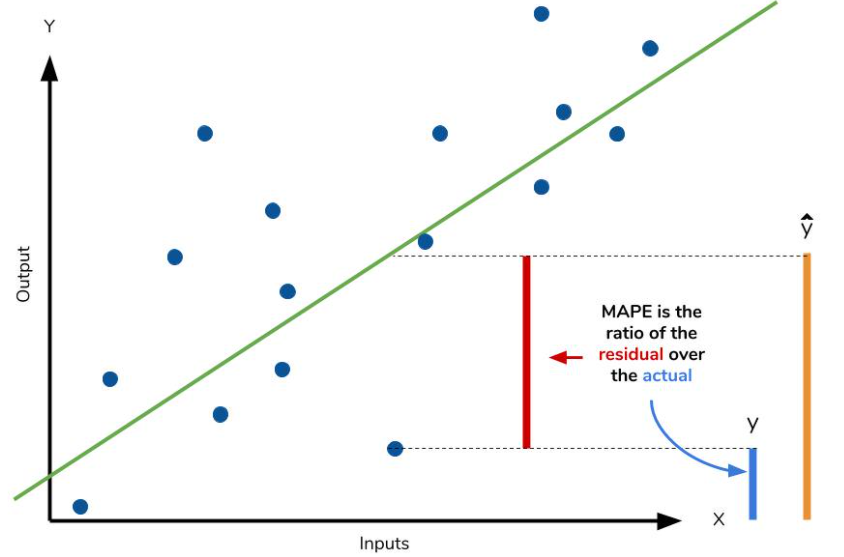

#### Kesimpulan

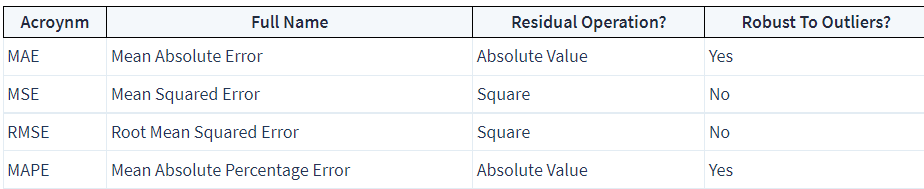

#### Praktek

##### Memisahkan data training dan data test 

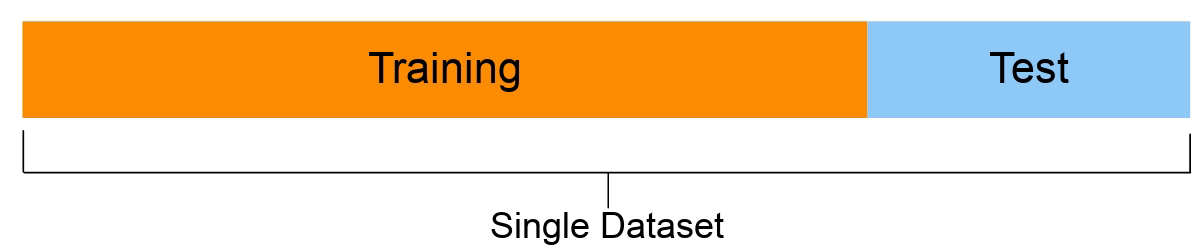

Memisahkan dataset dengan sklearn

In [ ]:
#panggil package yang dibutuhkan untuk membagi training dan testing
from sklearn.model_selection import train_test_split

# memisahkan data X dan y
X = data[['age','age_sq','Expr','expr_sq','female','educ15','educ16','educ17']]
y = data['salary'] 

#pisahkan dataset dengan sklearn
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=45)
print("Training data model", X_train.shape)
print("Testing data model", X_test.shape)
print("Testing data model", y_train.shape)

Training data model (218, 8)
Testing data model (55, 8)
Testing data model (218,)


Dari output diatas didapatkan bahwa data training sebanyak 218 data sedangkan data testing sebanyak 55.

##### Model Training 

In [ ]:
lm = LinearRegression()
lm.fit(X_train ,y_train)
print ("Nilai koefisien X:", lm.coef_)
print ("Nilai koefisien intersep:", lm.intercept_)

Nilai koefisien X: [ 1.45453457 -0.02066222  3.77982558 -0.07153079 -2.12821694  5.83623661
  6.75307216 17.41941718]
Nilai koefisien intersep: 19.821629252076484


##### Predicting and Error Measurement 

In [ ]:
# import package
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
#mencari nilai prediksi dari data y
y_prediction = lm.predict(X_test)

# mencari nilai MAE
print("MAE :", mean_absolute_error(y_test, y_prediction))
# mencari nilai MSE
print("MSE :", mean_squared_error(y_test, y_prediction, squared=True))
# mencari nilai RMSE
print("RMSE :", mean_squared_error(y_test, y_prediction, squared=False))
# mencari nilai MAPE
print("MSE :", mean_absolute_percentage_error(y_test, y_prediction))

MAE : 4.066978261459135
MSE : 29.0170182700433
RMSE : 5.386744682091709
MSE : 0.059758211505529776


## Elastic Net dan Cross Validation


Kita gunakan `data_large` diatas yang memasukkan seluruh variabel

In [ ]:
from sklearn.model_selection import train_test_split

# data_large

# memisahkan data X dan y
X = data_large.drop(columns=["salary", "Gender"])
y = data_large['salary'] 

#pisahkan dataset dengan sklearn
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=45)

Jangan lupa melakukan standarisasi variabel

In [ ]:
# standardizing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['age', 'Expr', 'education','femaleXage', 'age_sq', 'expr_sq', 'femaleXage_sq']] = scaler.fit_transform(X_train[['age', 'Expr', 'education','femaleXage', 'age_sq', 'expr_sq', 'femaleXage_sq']])
X_test[['age', 'Expr', 'education','femaleXage', 'age_sq', 'expr_sq', 'femaleXage_sq']] = scaler.transform(X_test[['age', 'Expr', 'education','femaleXage', 'age_sq', 'expr_sq', 'femaleXage_sq']])

Menjalankan model Elastic Net sekaligus melakukan cross validation

In [ ]:
from sklearn.linear_model import ElasticNetCV

elast_cv = ElasticNetCV(cv=10, random_state=0)
elast_cv.fit(X_train, y_train)

y_elastcv_pred = elast_cv.predict(X_train)
y_elastcv_test = elast_cv.predict(X_test)

print(f"alpha: {elast_cv.alpha_}")
print("RMSE training:", mean_squared_error(y_train, y_elastcv_pred, squared=False))
print("RMSE test:", mean_squared_error(y_test, y_elastcv_test, squared=False))

alpha: 0.02222159730554274
RMSE training: 4.76068798292152
RMSE test: 5.371158570225242


Note: alpha di sklearn merujuk kepada lambda dalam formula yang ada di slide.

Lambda adalah paramater yang mengatur besar kecilnya penalti.

Lambda kecil berarti penalti kecil, model yang dihasilkan mendekati OLS. Jumlah variable yang dihapus juga relatif kecil.

In [ ]:
# Koefisien setiap variabel

pd.DataFrame({"var":X_train.columns, "elastcv_coef":elast_cv.coef_})

,var,elastcv_coef
0,age,7.464023
1,Expr,20.743369
2,education,0.809511
3,female,-2.147436
4,educ_enc,2.816353
5,educ14,-1.100458
6,educ15,0.469933
7,educ16,-2.173895
8,educ17,2.124775
9,femaleXage,-0.000000


Terlihat bahwa ada satu variable yang diset menjadi nol `femaleXage`. variabel ini dibuang dari model

### Membandingkan model yg dihasilkan dari Elastic Net tanpa cross validation

In [ ]:
from sklearn.linear_model import ElasticNet

elast_reg = ElasticNet(random_state=0)
elast_reg.fit(X_train, y_train)

# elast_reg.intercept_
# elast_reg.coef_

from sklearn.metrics import mean_squared_error
# mencari nilai RMSE 
y_train_pred = elast_reg.predict(X_train)
y_test_pred = elast_reg.predict(X_test)

print("RMSE data training:", mean_squared_error(y_train, y_train_pred, squared=False))
print("RMSE data test:", mean_squared_error(y_test, y_test_pred, squared=False))


## mencetak koefisien
pd.DataFrame({"var":X.columns,
            "elastnet_coef":elast_reg.coef_,
            "elastcv_coef":elast_cv.coef_,
                })

RMSE data training: 8.327171263766198
RMSE data test: 8.009100766536069


,var,elastnet_coef,elastcv_coef
0,age,2.828131,7.464023
1,Expr,4.418219,20.743369
2,education,0.663156,0.809511
3,female,-0.338388,-2.147436
4,educ_enc,0.000000,2.816353
5,educ14,-0.000000,-1.100458
6,educ15,0.000000,0.469933
7,educ16,-0.000000,-2.173895
8,educ17,0.000000,2.124775
9,femaleXage,-0.958210,-0.000000


In [ ]:
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()

lm.fit(X_train, y_train)

# mencari nilai RMSE 
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)
print("RMSE training:", mean_squared_error(y_train, y_train_pred, squared=False))
print("RMSE test:", mean_squared_error(y_test, y_test_pred, squared=False))

pd.DataFrame({"var":X.columns,
            "elastnet_coef":elast_reg.coef_,
            "elastcv_coef":elast_cv.coef_,
            "linear_coef":lm.coef_,
                })

RMSE training: 4.554224435870884
RMSE test: 5.51964011861365


,var,elastnet_coef,elastcv_coef,linear_coef
0,age,2.828131,7.464023,7.218435
1,Expr,4.418219,20.743369,24.299577
2,education,0.663156,0.809511,0.408536
3,female,-0.338388,-2.147436,-17.015779
4,educ_enc,0.000000,2.816353,3.721589
5,educ14,-0.000000,-1.100458,-1.674344
6,educ15,0.000000,0.469933,0.050795
7,educ16,-0.000000,-2.173895,-3.227727
8,educ17,0.000000,2.124775,3.744381
9,femaleXage,-0.958210,-0.000000,11.983488


## Bootstrap

Bagaimana kalau kita ingin melihat stability dari paramater statistik? 


- Menggunakan pendekatan bootstrap.
- Misalnya melihat kestabilan Beta dari setiap variabel.
- Utk regularized regression, gunakan lambda hasil dari cross validation
- Semakin besar jumlah bootstrap semakin menyerupai normal distribution. Namun computationally intensive

In [ ]:
# Bootsrapping

import numpy as np
from sklearn.utils import resample
n_boots = 500

stats_intercept = list()
stats_coef = list()

df = pd.DataFrame(X_train).join(y_train)

# bootstrap
for i in range(n_boots):    
    df_resample = resample(df)
    X_boot, y_boot = df_resample.drop(columns='salary'), df_resample["salary"]
    model = ElasticNet(random_state=0, alpha=elast_cv.alpha_)
    model.fit(X_boot,y_boot)
    stats_intercept.append(model.intercept_)
    stats_coef.append(model.coef_)

Plot Bootsrap Confidence Interval dari setiap Koefisien Beta

- lihat seberapa jauh nilai koefisien dari mean dan juga nilai nol

0.95 confidence interval -2.0351889825777167 and 3.3538961360194692


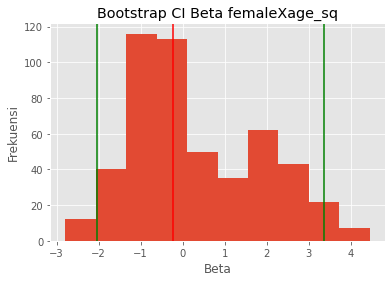

In [ ]:
# plot scores
idx = 12
df_coef = pd.DataFrame(stats_coef)


# confidence intervals
alpha = 0.95
lower = df_coef[idx].quantile(0.025)
upper = df_coef[idx].quantile(0.975)

print(f"{alpha} confidence interval {lower} and {upper}")

plt.style.use("ggplot")

#for idx in range(0,len(df_coef.columns)):    
plt.hist(df_coef[idx])
plt.axvline(x=elast_cv.coef_[idx], color="r")
plt.axvline(x=lower, color="g")
plt.axvline(x=upper, color="g")
plt.title(f"Bootstrap CI Beta {X_train.iloc[:,idx].name}")
plt.xlabel("Beta")
plt.ylabel("Frekuensi")
plt.show()

## Summary:

- Regularized regression berguna ketika jumlah p relatif besar dibandingkan dengan.
- Pada saat p > n maka OLS tidak dapat digunakan. Solusinya adalah dengan mengurangi variabel/dimensi:
    - pemilihan variabel secara manual
    - PCA
    - Lasso atau elastic net
    - Teknik lain untuk variable selection
- Bootstrap bermanfaat saat jumlah sampel sangat kecil atau saat tidak tersedia teori statistik

## Daftar Pustaka

https://seaborn.pydata.org/

https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://www.thedataincubator.com/blog/2017/11/08/scikit-learn-vs-statsmodels/

https://www.dataquest.io/blog/understanding-regression-error-metrics/
